# App - Ubicación del IIS en tiempo real sobre mapa

Vamos a realizar una aplicación que muestre en tiempo real la ubicación de la Estación Espacial Internacional (ISS) utilizando un motor de mapas disponible como un paquete adicional en matplotlib.

Fuente: http://maxberggren.se/2015/08/04/basemap/

## Preparación del ambiente
Vamos a preparar el ambiente de trabajo. Para esto vamos a mantenernos aislados de la instalación base de Python, lo que significa que vamos a trabajar en un ambiente virtual. En un terminal del sistema en en la ventana Anaconda Prompto (¡no en una ventana de Power Shell!), creamos un ambiente virtual:

    conda create --name geomaps
    
Esto crea un ambiente virtual de trabajo con el kernel base de Python. Vamos a habilitar el ambiente:

    conda activate geomaps
    
    
Para desactivar el ambiente virtual, será necesario ingresar la instrucción:

    conda deactivate
    
Si deseo, en algun momento, eliminar el ambiente virtual, se ejecuta la instrucción:

    conda env remove --name geomaps
    
Podemos verificar que nos encontramos en el ambiente correcto porque en el prompt de comando tendremos el prefijo `(geomaps)`, aunque también podemos verificar cual es el ambiente activo en la sesión con la instrucción:

    conda info --envs
    
El ambiente con el simbolo `*` será el ambiente activo. Todo lo que realizemos en este ambiente se mantendrá dentro de este sin que afecte a la instalación base. Instalemos las librerías necesarias para la aplicación:

    conda install -c anaconda basemap
    
Como se observará, el paquete instalador de conda instala muchos paquetes que ya se encuentran previamente instados en la instalación base (como numpy, matplotlib, etc), pero no en el ambiente virtual.

### Ambientes virtuales en Spyder
Si quiero trabajar con el ambiente virtual será necesario cambiar el ambiente de trabajo. Para esto hay que acceder Preference y cambiar el ambiente:

![](https://docs.spyder-ide.org/4/_images/faq-change-environment.png)
![](https://docs.spyder-ide.org/4/_images/faq-python-interpreter.png)

### Ambientes virtuales en Jupyter
Si se quiere trabajar con el ambiente virtual en Jupyter Notebook hay varias formas de hacerlo, Esta es la más sencilla y definitiva ya que asocia el ambiente activo y el base con la instalación de Jupyter:

Salir del ambiente actual:

    conda deactivate
    
Instalar el paquete de gestor de ambiente en ipython:

    conda install nb_conda_kernels
    
Volver a activar el ambiente:

    conda activate geomaps
    
Ya puestos en el ambiente virtual, debemos de activar el ambiente generado dentro de Jupyter Notebook. Para esto debemos instalar:

    conda install ipykernel
    
Y luego abrir Jupyter Notebook (note que esta abriendo la aplicación desde el ambiente virtual). Podrá observar que en el listado de kernels estará disponible, además de la instalación base, el kernel del ambiente virtual.
![](https://miro.medium.com/max/560/1*XELL6xTQZ-B-CQI88oImzA.png)

## Introducción a los mapas con Basemap
Basemap es una paquete que utiliza como base Matplotlib para generar mapas. Un mapa clase Basemap se define en función de una projección (la forma como un globo se "aplana"), así como su posición base de observación (latitus y longitud central).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [21]:
m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0

Le vamos a agregar las lineas paralelas y meridianas al mapa, definidas como arreglos de Numpy.

In [22]:
n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

Luego, tomamos todos los elementos anteriores y definimos un mapa (según un código de referencia según la fuente citada anteriormente):

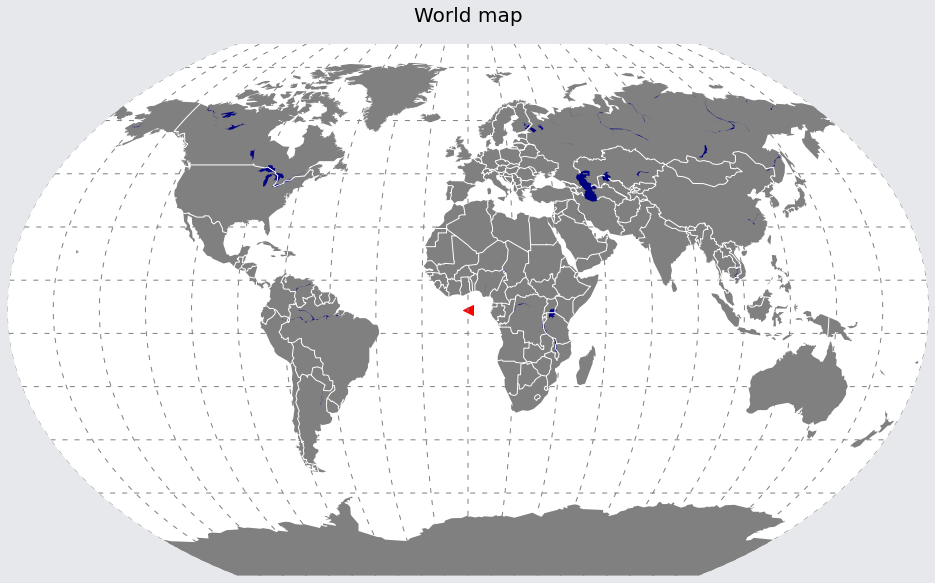

In [25]:
fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('gray', 
                 lake_color='navy')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

title = plt.title('World map', 
                  fontsize=20) 
title.set_y(1.03) # Move the title a bit for niceness

x1, y1 = m(0, 0)  # Convert coords to projected place in figure

m.scatter(x1, y1, marker='<', color='red', s=100)

## Ajustes al código
Vamos a ajustar el formato del código y algunas modificar algunas líneas para que se ajuste a nuestro estilo de trabajo (definir fig y axes utilizando plt.subplots, por ejemplo).

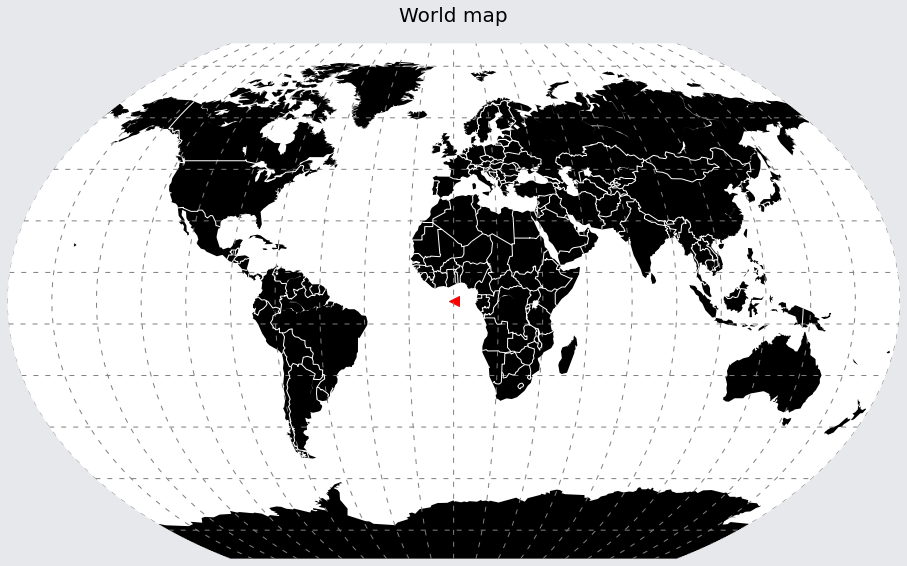

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

m = Basemap(resolution='c', projection='kav7', lat_0=0., lon_0=0.) # lat 0, lon 0

n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

fig, ax = plt.subplots(figsize=(16,20))
fig.set_facecolor('#e6e8ec')

m.drawmapboundary(color='white', linewidth=0.0, fill_color='white')
m.drawparallels(parallels, linewidth=lw, dashes=dashes, color=graticules_color)
m.drawmeridians(meridians, linewidth=lw, dashes=dashes, color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', lake_color='white')
m.drawcountries(linewidth=1, linestyle='solid', color='white', zorder=30)

title = plt.title('World map', fontsize=20) 
title.set_y(1.03) # Move the title a bit for niceness

x1, y1 = m(0, 0) # Convert coords to projected place in figure

ax.scatter(x1, y1, marker='<', color='red', s=100)

Una vez definido correctamente el código, probemos encapsularlo en una función que retorne la figura y el axis para poder incluír estos objetos en una aplicación.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

def get_map():
    m = Basemap(resolution='c', projection='kav7', lat_0=0., lon_0=0.) # lat 0, lon 0

    n_graticules = 18
    parallels = np.arange(-80., 90, n_graticules)
    meridians = np.arange(0., 360., n_graticules)
    lw = 1
    dashes = [5,7] # 5 dots, 7 spaces... repeat
    graticules_color = 'grey'

    fig, ax = plt.subplots(figsize=(16,20))
    fig.set_facecolor('#e6e8ec')

    m.drawmapboundary(color='white', linewidth=0.0, fill_color='white')
    m.drawparallels(parallels, linewidth=lw, dashes=dashes, color=graticules_color)
    m.drawmeridians(meridians, linewidth=lw, dashes=dashes, color=graticules_color)
    m.drawcoastlines(linewidth=0)
    m.fillcontinents('black', lake_color='white')
    m.drawcountries(linewidth=1, linestyle='solid', color='white', zorder=30)

    title = plt.title('World map', fontsize=20) 
    title.set_y(1.03) # Move the title a bit for niceness

    x1, y1 = m(0, 0) # Convert coords to projected place in figure

    return fig, ax

Probemos la función:

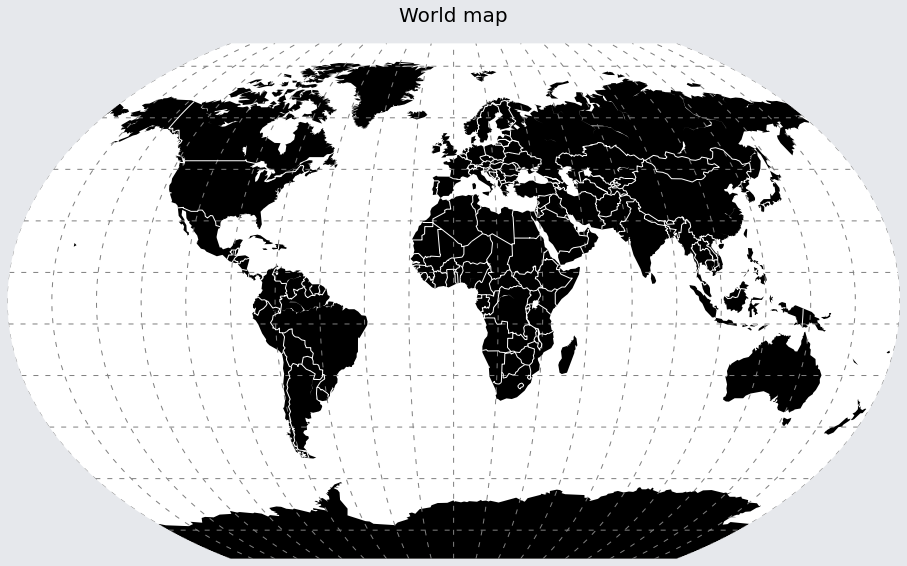

In [41]:
fig, ax = get_map()

## Aplicación tkinter
Se puede coinstruir un ambiente GUI con un FigureCanvasTkAgg que contenga la figura y el axis generados por la funcion get_map (como un método de la clase de la aplicación gráfica) y utilizar un mecanismo de interactividad para así poder obtener información en tiempo real de la ubicación del ISS y mostrarla en el mapa.

NOTA: Hay que asegurarse de tener instalado el paquete request en el ambiente virtual.

-17.4202 44.8121
-13.0268 42.8318
-8.9014 40.6569
-5.0928 38.3468
-1.5426 35.9057
1.8011 33.3304
4.9089 30.6801
7.8577 27.925
10.6223 25.1233
13.2714 22.2394
15.7814 19.3308
18.1936 16.3824
20.5448 13.3766
22.8121 10.3708
25.0492 7.3208
27.2339 4.2831
29.3989 1.2383
31.5757 -1.8334
33.7422 -4.8757
35.9487 -7.9342
38.1728 -10.9521
40.4667 -13.9741
42.8075 -16.9433
45.2513 -19.9025
47.7754 -22.7952
50.4181 -25.6368
53.2242 -28.4412
56.1687 -31.1503
59.3248 -33.7968
62.6652 -36.3225
66.2706 -38.7524
70.1068 -41.028
74.2602 -43.1654
78.6805 -45.106
83.4111 -46.8428
88.494 -48.3606
93.8289 -49.6076
99.47 -50.5791
105.2702 -51.2375
111.2518 -51.5773
117.2307 -51.5843
123.2156 -51.2586
129.0222 -50.6137
134.6267 -49.6642
140.0188 -48.4198
118.6429 -47.8034


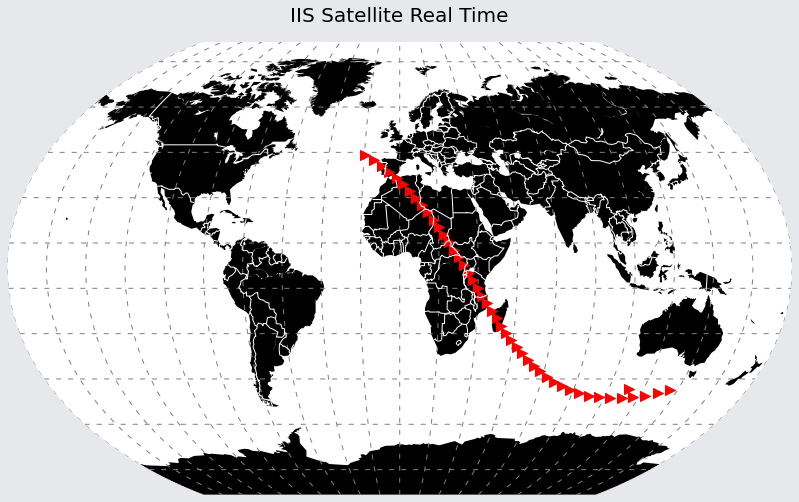

In [96]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from mpl_toolkits.basemap import Basemap
import requests

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.geometry('800x600+50+50')
        
        self.URL = "http://api.open-notify.org/iss-now.json"
        
        frm = tk.Frame(self)
        frm.pack()
        
        self.fig, self.ax = self.get_map() 
        self.graph = FigureCanvasTkAgg(figure=self.fig, master=frm)
        self.graph.get_tk_widget().pack()
        plt.tight_layout()
        
        self.update_map()
        
        
    def get_map(self):
        self.m = Basemap(resolution='c', projection='kav7', lat_0=0., lon_0=0.) # lat 0, lon 0

        n_graticules = 18
        parallels = np.arange(-80., 90, n_graticules)
        meridians = np.arange(0., 360., n_graticules)
        lw = 1
        dashes = [5,7] # 5 dots, 7 spaces... repeat
        graticules_color = 'grey'

        fig, ax = plt.subplots(figsize=(16,20))
        fig.set_facecolor('#e6e8ec')

        self.m.drawmapboundary(color='white', linewidth=0.0, fill_color='white')
        self.m.drawparallels(parallels, linewidth=lw, dashes=dashes, color=graticules_color)
        self.m.drawmeridians(meridians, linewidth=lw, dashes=dashes, color=graticules_color)
        self.m.drawcoastlines(linewidth=0)
        self.m.fillcontinents('black', lake_color='white')
        self.m.drawcountries(linewidth=1, linestyle='solid', color='white', zorder=30)

        title = plt.title('IIS Satellite Real Time', fontsize=20) 
        title.set_y(1.03)

        return fig, ax

    def query_iss(self):
        r = requests.get(self.URL)

        if r.status_code == requests.codes.ok:
            data = r.json()
            latitude = float(data['iss_position']['latitude'])
            longitude = float(data['iss_position']['longitude'])
            
        return latitude, longitude
    
    def update_map(self):
        lat, lng = self.query_iss()
        lng_map, lat_map = self.m(lng, lat)
        print(lng, lat)

        self.ax.scatter(lng_map, lat_map, marker='>', color='red', s=100, zorder=10)
        self.graph.draw()
        
        self.after(1000 * 60, self.update_map)
    
        
app = App().mainloop()